# Result Visualization

The goal here is to use some plots of data points to understand how well the model is performing intuitively with respect to the actual datapoints.


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import math
import sqlite3
import numpy as np


gradient_boost_regression = pickle.load(open('final_model.pickle', 'r'))
test_conn  = sqlite3.connect('./sqlite/validation_incidents.sqlite')
test_results = test_conn.execute("SELECT * from incidents")



I need to get the data shaped appropriately (simple arrays), and I'll also get a set of predictions to compare in plot form.

In [14]:
test_inputs = []
test_labels = []
for rec in test_results:
    test_labels.append(rec[1])
    test_inputs.append(rec[2:])
    

inputs_test = np.array(test_inputs)
labels_test = np.array(test_labels)
labels_predict = gradient_boost_regression.predict(inputs_test)

Now we start plotting, x-axis will just be array indicies, what we really want to see is how the same y value compares from real value to predicted
value

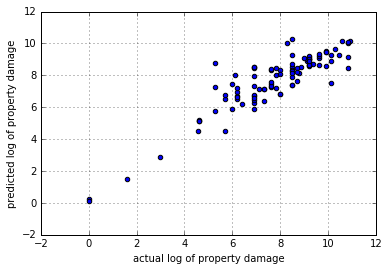

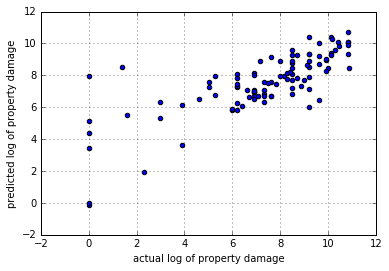

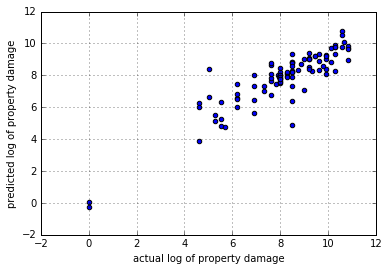

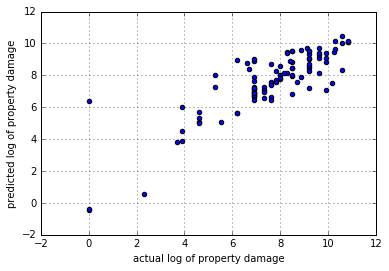

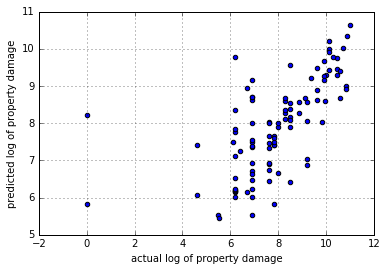

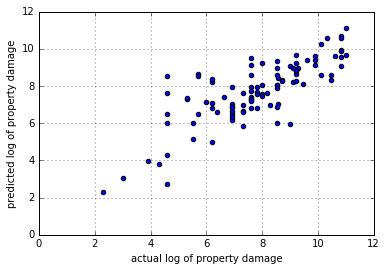

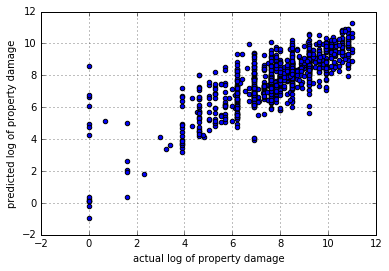

In [46]:
import random

def plot_random_combination(size, labels1, labels2):
    l_group_1 = []
    l_group_2 = []
    x_values = range(size)
    for i in x_values:
        random_index = random.randint(0,len(labels1)-1)
        l_group_1.append(labels1[random_index])
        l_group_2.append(labels2[random_index])
    
    fig, ax = plt.subplots()
    ax.set_xlabel('actual log of property damage')
    ax.set_ylabel('predicted log of property damage')
    plt.scatter(l_group_1, l_group_2, alpha=None, linewidths=None,
            verts=None, edgecolors=None, hold=None, data=None)
    plt.grid(True)
    plt.show()



for i in range(6):
    plot_random_combination(100, labels_test, labels_predict)

plot_random_combination(1000, labels_test, labels_predict)